In [1]:
import IPython.core.display as di;
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# <center>决策树</center>

## INTRODUCTION

　　决策树(Decision Tree)是数据挖掘中一种基本的分类和回归方法,它呈树形结构,在分类问题中,表示基于特征对实例进行分类的过程,可以认为是if-then规则的集合,也可以认为是定义在特征空间与类空间中的条件概率分布.

　　主要的决策树算法有ID3算法、C4.5算法和CART算法

　　一个性能良好的决策树,是一个与训练数据矛盾较小的决策树,同时又具有很好地泛华能力.言外之意就是说,好的决策树不仅对训练样本有很好的分类效果,对于测试集也有较低的误差率.一个决策树的学习过程包括三个步骤:特征选择、决策树的生成以及决策树的修剪.

## 一、决策树模型的两种解释

### 1.1 决策树模型

　　分类决策树模型是一种描述对实例进行分类的树形结构.决策树由结点和有向边组成.结点有两种类型:内部结点和叶节点.内部结点表示一个特征或属性,叶节点表示一个类.

### 1.2 决策树与if-then规则

　　可以将决策树看成一个if-then规则的集合.即由决策树的根结点到叶节点的每一条路径构建一条规则;路径上内部结点的特征对应着规则的条件,而叶结点的类对应着规则的结论.

　　决策树的路径或其对应的if-then规则集合的重要性质:互斥且完备(每一个实例都被一条路径或一条规则所覆盖,且只被一条路径或一条规则所覆盖,这里的覆盖是指实例的特征与路径上的特征一致或实例满足规则的条件)

## 二、特征选择

### 2.1特征选择问题

　　若利用一个特征进行分类的结果与随机分类的结果没有很大差异,则称这个特征是没有分类能力的.特征选择的准则是信息增益或信息增益比.直观上,若一个特征具有更好的分类能力,或者说,按照这一特征将训练数据集分割为子集,使得各个子集在当前条件下有最好的分类,那么就更应选择这个特征.信息增益可以表示这一直观准则.

### 2.2 信息增益

#### 2.2.1熵

　　信息熵(information entropy)是度量样本集合纯度最常用的一种指标

　　在信息论与概率统计中,熵表示随机变量不确定性的度量.设X是一个去有限个值的离散随机变量,其概率分布为

$$P(X=x_i) = p_i\ ,\ i=1,2,\cdots,n$$

　　则随机变量X的熵定义为:

$$H(x) = -\sum_{i=1}^n p_i \log p_i$$

　　若$p_i$等于0,定义$0\log0 = 0$,熵的单位为比特或者纳特.

　　熵的值越小,表示其纯度越高.

#### 2.2.2条件熵

 　　$H(Y|X)$表示在已知随机变量X的条件下随机变量Y的不确定性定义为X给定条件下Y的条件概率分布的熵,对X的数学期望

$$H(Y|X)=\sum_{i=1}^np_iH(Y|X=x_i)$$

　　经验熵和经验条件熵:当熵和条件上中的概率由数据估计(特别是极大似然估计)得到时,所对应的熵与条件熵分别称为经验熵和条件经验熵.

#### 2.2.3信息增益

　　信息增益表示得知特征X的信息而使得类Y的信息的不确定性减少的程度.特征A对训练数据集D的信息增益g(D,A)定义为集合D的经验熵H(D)与特征A给定条件下D的经验条件熵H(D|A)之差,即

$$g(D,A) = H(D) - H(D|A)$$

　　一般地,熵H(Y)与条件熵H(Y|X)之差称为互信息.决策树学习中的信息增益等价于训练数据集中类与特征的互信息.

　　于是我们可以应用信息增益准则来选择特征,信息增益表示由于特征A而使得对数据集D的分类的不确定性减少的程度.对于数据集D而言,信息增益依赖于特征,不同的特征往往具有不用的信息增益.信息增益大的特征具有更强的分类能力.

#### 2.2.3信息增益算法|

　　根据信息增益准则的特征选择方法为对训练数据集(或子集)D,计算其每个特征的信息增益,并比较它们的大小,选择信息增益最大的特征.

　　在描述算法前,先对符号进行说明:

　　设训练数据集为D,|D|表示其样本容量,即样本个数.设有K个类$C_k\ ,\ k=1,2,\cdots,...K$,$|C_k|$为属于类$C_k$的样本个数,$\sum_{k=1}^K|C_k|=|D|$.设特征A有n个不同的取值$a_1,a_2,\cdots,a_n$根据特征A的取值将D划分为n个子集$D_1,D_2,\cdots,D_n$,$|D_i|$为$D_i$的样本个数,$\sum_{i=1}^n|D_i|=|D|$.记子集$D_i$中属于类$C_k$的样本的集合为$D_{ik}$,即$D_{ik}=D_i\bigcap C_k$,$D_{ik}$为$D_{ik}$的样本个数.

　　具体算法步骤如下:

1) 计算数据集D的经验熵$H(D)$

$$H(D)=\sum_{k=1}^K \frac{|C_k|}{|D|}\log_2 \frac{|C_k|}{|D|}$$

2) 计算特征A对数据集D的经验条件熵$H(D|A)$

$$H(D|A)=\sum_{i=1}^n\frac{|D_i|}{|D|}H(D_i) = -\sum_{i=1}^n\frac{D_i}{D}\sum_{k=1}^K\frac{|D_{ik}|}{|D_i|}\log_2\frac{|D_{ik}|}{|D_i|}$$

3) 计算信息增益

$$g(D,A)=H(D) - H(D|A)$$

### 2.3 信息增益比

　　以信息增益作为划分训练数据集的特征,存在偏向于选择取值较多的特征的问题.使用信息增益比可以对这一问题进行校正.

　　信息增益比表示特征A对训练数据集D的信息增益比.$_{gR}(D,A)$定义为其信息增益$_{gR}(D,A)$与训练数据集D关于特征A的值的熵$H_A(D)$之比,即

$$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$$

### 2.4 基尼指数

　　分类问题中,假设有K个类,样本点属于第k类的概率为$p_k$,则概率分布的基尼系数定义为:

$$Gini(p)=\sum_{k=1}^Kp_k(1-p_k)=1-\sum_{k=1}^K p_k^2$$

　　若样本集合D根据特征A是否取某一可能值$\alpha$被分割成$D_1$和$D_2$两部分,即

$$D_1=\{(x,y) \in D|A(x)=0\}\ ,\ D_2 = D-D_1$$

则在特征A的条件下,集合D的基尼指数定义为:

$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1) + \frac{|D_2|}{|D|}Gini(D_2)$$

　　基尼系数Gini(D)表示集合D的不确定性,表示经A=a分割后集合D的不确定性.基尼系数越大,样本集合的不确定性越大,与熵类似.

## 三、决策树的生成

### 3.1ID3算法

　　ID3算法的核心是在决策树各个结点上应用<font color=red>信息增益准则</font>选择特征,递归地构建决策树.

　　其具体方法为:从根结点开始,对结点计算所有可能的特征的信息增益,选择信息增益最大的特征作为结点的特征,由该特征的不同取值建立子结点;再对子结点递归地调用以上方法,构建决策树;直到所有特征的信息增益很小或没有特征可以选择为止.最后得到一个决策树.ID3相当于用极大似然法进行概率模型的选择.但是ID3算法只有树的生成,所以该算法生成的树容易产生过拟合.

### 3.2 C4.5

　　与ID3算法相似,C4.5算法对ID3算法进行了改进,C4.5在生成的过程中,用信息增益比来选择特征.

### 3.3 CART

　　分类树与回归树(classification and regression tree, CART)模型(Breiman)由特征选择、树生成及剪枝组成,既可用于分类也可用于回归.CART是在给定输入随机变量X条件下输出变量Y的条件概率分布的学习方法.它假定决策树是二叉树,内部取值为"是"(左分支)和"否"(右分支)

它的基本步骤为:

1) 决策树生成:基于训练数据集生成决策树,生成的决策树要尽量大.  
2) 决策树剪枝:用验证数据集对已生成的树进行剪枝并选择最优子树,这是用损失函数最小最为剪枝的标准.

#### 3.3.1 分类树

　　对分类树用<font color=red>基尼系数(Gini index)最小化准则</font>,进行特征选择,生成二叉树.

　　具体算法步骤如下:

　　1) 设结点的训练数据集为D,计算现有特征对该数据集的基尼指数.此时,对每一个特征A,对其可能取的每个值$\alpha$,根据样本点$A=\alpha$的测试为"是"或者"否"将D分割为$D_1$和$D_2$两部分,计算其基尼指数.  
　　2) 在所有可能的特征A以及它们所有可能的切分点$\alpha$中,选择基尼系数最小的特征及其对应的切分点作为最优特征与最优切分点.依最优特征与最优切分点,从现结点生成两个子结点,将训练数据集依特征分配到两个子结点中去.  
　　3) 对两个子结点递归地调用上述两个步骤,直至满足停止条件.  
　　4) 生成CART决策树

#### 3.3.2 回归树

　　首先看一个简单的回归树生成实例:

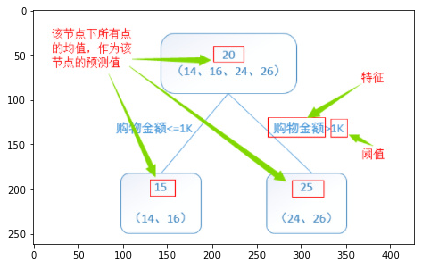

In [4]:
from skimage import io
img=io.imread('./regression_tree.jpg')
io.imshow(img)

　　接下来具体说说回归树是如何进行特征选择生成二叉回归树的.

　　假设X与Y分别为输入和输出变量,并且Y是连续变量,给定训练数据集

$$D = \{(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)\}$$

　　我们利用最小二乘法回归树生成算法来生成回归树$f(x)$,即在训练数据集所在的输入空间中,递归地将每个区域分为两个子区域并决定每个子区域上的输出值,构建二叉决策树,步骤如下:

　　1) 选择最优切分变量j与切分点s,求解:

$$\min_{j,s}[\min_{c_1}\sum_{x_i \in R_1(j,s)}(y_i-c_1)^2 + \min_{c_2}\sum_{x_i \in R_2(j,s)}(y_i-c_2)^2]$$

　　遍历变量j,对固定的切分变量j扫描切分点s,选择使上式达到最小值的对j,s

　　2) 用选定的对$(j,s)$划分区域并决定相应的输出值:

$$R_1(j,s)=\{x|x^{(j)}<=s\}\ ,\ R_2{j,s}=\{x|x^{(j)} > s\}$$

　　3) 继续对两个子区域调用步骤(1),(2)直至满足停止条件

　　4) 将输入空间划分为M个区域$R_1,R_2,\cdots,R_M$在每个单元$R_M$上有一个固定的输出值$c_m$,生成决策树:

$$f(x)=\sum_{m=1}^M \hat{c}_mI(x\in R_m)$$

## 三、决策树的剪枝

### 4.1 剪枝

　　决策树的过拟合指的是学习时过多地考虑如何提高对训练数据的正确分类,从而构建出过于复杂的决策树.解决过拟合的办法是考虑决策树的复杂度,对已生成的决策树进行简化,即剪枝(从已生成的书上裁剪掉一些子树或叶结点,并将其根结点或父结点作为新的叶结点,从而简化分类模型).

　　设树T的叶结点个数为|T|,t是树T的叶结点,有$N_t$个样本点,其中$k$类的样本点有$N_{tk}$个,$k=1,2,\cdots,K$,$H_t(T)$为叶结点t上的经验熵,$\alpha>=0$为参数,则决策树学习的损失函数可以定义为

$$C_{\alpha}(T)=\sum_{t=1}^{|T|}N_tH_t(T)+\alpha|T|$$

　　其中经验熵为

$$H_t(T)=-\sum_{k}\frac{N_{tk}}{N_t}\log\frac{N_{tk}}{N_t}$$

　　在损失函数中,将右端第一项记作

$$C(T)=\sum_{t=1}^{|T|}N_tH_t(T)=-\sum_{t=1}^{|T|}\sum_{k=1}^KN_{tk}\log\frac{N_{tk}}{N_t}$$

　　其中,C(T)表示模型对训练数据的预测误差,即模型与训练数据的拟合程度,|T|表示模型复杂度,参数$\alpha>=0$控制两者之间的影响.较大的$\alpha$促使选择较简单的模型,较小的$\alpha$促使选择较复杂的模型.$\alpha=0$意味这只考虑模型与训练数据的拟合程度,不考虑模型的复杂度.

　　决策树生成只考虑了通过信息增益(或信息增益比)对训练数据进行更好的拟合.而决策树剪枝通过优化损失函数还考虑了减小模型复杂度.决策树生成学习局部的模型,而决策树剪枝学习整体的模型.此损失函数的极小化等价于正则化的极大似然估计,即利用损失函数最小原则进行剪枝就是用正则化的极大似然估计进行模型选择.

### 4.1 CART剪枝

　　CART剪枝算法从"完全生长"的决策树的底端减去一些子树,使决策树变小(模型变简单),从而能够对未知数据有更准确的预测

　　其具体步骤如下:

　　1) 首先从生成算法产生的决策树$T_0$底端开始不断剪枝,知道$T_0$的根结点,形成一个数字序列${T_0,T_1,T_2,\cdots,T_n}$;在剪枝过程中,计算子树的损失函数

$$C_{\alpha}(T)=C(T)+\alpha|T|$$

　　其中,T为任意子树,C(T)为对训练数据的预测误差(如基尼系数),|T|为子树的叶结点个数,$\alpha$为参数,$C_{\alpha}(T)$为参数是$\alpha$时的子树T的整体损失.参数$\alpha$权衡训练数据的拟合程度与模型的复杂度.

　　对固定的$\alpha$,一定存在使损失函数$C_{\alpha}(T)$最小的子树,将其表示为$T_{\alpha}$.$T_{\alpha}$在损失函数$C_{\alpha}(T)$最小的意义下是最优的,且是唯一的.$\alpha$大的时候,最优子树$T_{\alpha}$偏下;$\alpha$小的时候,最优子树$T_{\alpha}$偏大.极端情况,$\alpha=0$时,整体树是最优的

　　Breiman等人证明:可以用递归地方法对树进行剪枝.将$\alpha$从小增大,$0=\alpha_0<\alpha_1<\cdots \alpha_n < +\infty$产生一系列的区间$[\alpha_i,\alpha_{i+1}),i=0,1,\cdots,n$;剪枝得到的子树序列对应这区间$\alpha \in [\alpha_i,\alpha_{i+1}),i=0,1,2,\cdots,n$的最优子树序列为${T_0,T_1,T_2,\cdots,T_n}$,序列的子树是嵌套的.

　　具体地,从整体数$T_0$开始剪枝,对$T_0$的内部结点t,以t为单结点数的损失函数为

$$C_{\alpha}=C(t)+\alpha$$

　　以t为根结点的子树$T_t$的损失函数是

$$C_{\alpha}(T_t)=C(T_t)+\alpha|T_t|$$

　　当$\alpha=0$及$\alpha$充分小时,有不等式

$$C_{\alpha}(T_t)小于C_{\alpha}(T)$$

　　当a再增大时，有不等式

$$C_{\alpha}(T_t)大于C_{\alpha}(T)$$

　　只要$\alpha=\frac{C(t)-C(T_t)}{|T_t|-1}$,$T_t$与t有相同的损失函数值,而t的结点少,因此t比$T_t$更可取,对$T_t$进行剪枝.

　　为此,对$T_0$中每一个内部结点t,计算

$$g(t)=\frac{C(t)-C(T_t)}{|T_t|-1}$$

　　它表示剪枝后整体损失函数减少的程度.在$T_0$中剪去$g(t)$最小的$T_t$,将得到的子树作为$T_1$,同时将最小的$g(t)$设为$\alpha_1$,$T_1$为区间$[\alpha_1,\alpha_2)$的最优子树.

　　如此剪枝下去,直至得到根结点.在这一过程中,不断得增加$\alpha$的值,产生新的区间.

　　2) 在剪枝得到的子树序列$T_0,T_1,\cdots,T_n$中通过交叉验证选取最优子树$T_\alpha$

　　具体地,利用独立的验证数据集,测试子树序列$T_0,T_1,\cdots,T_n$中各颗子树的平方误差或基尼指数.平方误差或基尼指数最小的决策树被认为是最优的决策树.在子树序列中,每颗子树$T_0,T_1,\cdots,T_n$都对应一个参数$\alpha_1,\alpha_2,\cdots,\alpha_n$.所以当最优子树$T_k$确定时,对应的$\alpha_k$也就确定了,即得到最优决策树$T_\alpha$